In [107]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
sns.set_context('notebook')

In [79]:
preds

,id_str,hdf5_loc,smooth-or-featured-jwst_smooth_fraction,smooth-or-featured-jwst_featured-or-disk_fraction,smooth-or-featured-jwst_star-artifact-zoom_fraction,disk-edge-on-jwst_yes_fraction,disk-edge-on-jwst_no_fraction,has-spiral-arms-jwst_yes_fraction,has-spiral-arms-jwst_no_fraction,bar-jwst_strong_fraction,...,spiral-arm-count-jwst_cant-tell_fraction,clumps-jwst_yes_fraction,clumps-jwst_no_fraction,merging-jwst_none_fraction,merging-jwst_minor-disturbance_fraction,merging-jwst_major-disturbance_fraction,merging-jwst_merger_fraction,problem-jwst_star_fraction,problem-jwst_artifact_fraction,problem-jwst_bad-zoom_fraction
0,22615,test_predictions.hdf5,0.563942,0.337515,0.098543,NaN,NaN,NaN,NaN,NaN,...,NaN,0.150174,0.849826,0.628316,0.307455,0.044674,0.019555,NaN,NaN,NaN
1,4389,test_predictions.hdf5,0.473793,0.123579,0.402628,NaN,NaN,NaN,NaN,NaN,...,NaN,0.439567,0.560433,0.502046,0.319960,0.081944,0.096049,NaN,NaN,NaN
2,28443,test_predictions.hdf5,0.641872,0.094559,0.263568,NaN,NaN,NaN,NaN,NaN,...,NaN,0.267874,0.732126,0.761670,0.188920,0.034543,0.014868,NaN,NaN,NaN
3,11090,test_predictions.hdf5,0.640018,0.201060,0.158922,NaN,NaN,NaN,NaN,NaN,...,NaN,0.313333,0.686667,0.323048,0.405022,0.245607,0.026323,NaN,NaN,NaN
4,19397,test_predictions.hdf5,0.603720,0.153238,0.243042,NaN,NaN,NaN,NaN,NaN,...,NaN,0.335382,0.664618,0.292732,0.455138,0.228996,0.023134,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,22438,test_predictions.hdf5,0.429178,0.434161,0.136661,NaN,NaN,NaN,NaN,NaN,...,NaN,0.422018,0.577982,0.469363,0.340634,0.067687,0.122315,NaN,NaN,NaN
1532,13185,test_predictions.hdf5,0.442534,0.151487,0.405980,NaN,NaN,NaN,NaN,NaN,...,NaN,0.390789,0.609211,0.576194,0.306281,0.084854,0.032671,NaN,NaN,NaN
1533,6822,test_predictions.hdf5,0.559561,0.048270,0.392169,NaN,NaN,NaN,NaN,NaN,...,NaN,0.273276,0.726724,0.642150,0.277253,0.055443,0.025154,NaN,NaN,NaN
1534,23476,test_predictions.hdf5,0.541873,0.094256,0.363871,NaN,NaN,NaN,NaN,NaN,...,NaN,0.273786,0.726214,0.688641,0.229843,0.057757,0.023759,NaN,NaN,NaN


In [94]:
# preds = pd.read_csv('/Users/user/repos/gz-jwst/results/test_predictions.csv')
preds = pd.read_parquet('/Users/user/repos/gz-jwst/results/test_predictionssummary_friendly.parquet')
preds = preds.rename(columns=dict(zip(preds.columns.values,[col.replace('jwst', 'ml') for col in preds.columns.values])))

preds['id_str'] = preds['id_str'].astype(int)
preds

,id_str,hdf5_loc,smooth-or-featured-ml_smooth_fraction,smooth-or-featured-ml_featured-or-disk_fraction,smooth-or-featured-ml_star-artifact-zoom_fraction,disk-edge-on-ml_yes_fraction,disk-edge-on-ml_no_fraction,has-spiral-arms-ml_yes_fraction,has-spiral-arms-ml_no_fraction,bar-ml_strong_fraction,...,spiral-arm-count-ml_cant-tell_fraction,clumps-ml_yes_fraction,clumps-ml_no_fraction,merging-ml_none_fraction,merging-ml_minor-disturbance_fraction,merging-ml_major-disturbance_fraction,merging-ml_merger_fraction,problem-ml_star_fraction,problem-ml_artifact_fraction,problem-ml_bad-zoom_fraction
0,22615,test_predictions.hdf5,0.563942,0.337515,0.098543,NaN,NaN,NaN,NaN,NaN,...,NaN,0.150174,0.849826,0.628316,0.307455,0.044674,0.019555,NaN,NaN,NaN
1,4389,test_predictions.hdf5,0.473793,0.123579,0.402628,NaN,NaN,NaN,NaN,NaN,...,NaN,0.439567,0.560433,0.502046,0.319960,0.081944,0.096049,NaN,NaN,NaN
2,28443,test_predictions.hdf5,0.641872,0.094559,0.263568,NaN,NaN,NaN,NaN,NaN,...,NaN,0.267874,0.732126,0.761670,0.188920,0.034543,0.014868,NaN,NaN,NaN
3,11090,test_predictions.hdf5,0.640018,0.201060,0.158922,NaN,NaN,NaN,NaN,NaN,...,NaN,0.313333,0.686667,0.323048,0.405022,0.245607,0.026323,NaN,NaN,NaN
4,19397,test_predictions.hdf5,0.603720,0.153238,0.243042,NaN,NaN,NaN,NaN,NaN,...,NaN,0.335382,0.664618,0.292732,0.455138,0.228996,0.023134,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,22438,test_predictions.hdf5,0.429178,0.434161,0.136661,NaN,NaN,NaN,NaN,NaN,...,NaN,0.422018,0.577982,0.469363,0.340634,0.067687,0.122315,NaN,NaN,NaN
1532,13185,test_predictions.hdf5,0.442534,0.151487,0.405980,NaN,NaN,NaN,NaN,NaN,...,NaN,0.390789,0.609211,0.576194,0.306281,0.084854,0.032671,NaN,NaN,NaN
1533,6822,test_predictions.hdf5,0.559561,0.048270,0.392169,NaN,NaN,NaN,NaN,NaN,...,NaN,0.273276,0.726724,0.642150,0.277253,0.055443,0.025154,NaN,NaN,NaN
1534,23476,test_predictions.hdf5,0.541873,0.094256,0.363871,NaN,NaN,NaN,NaN,NaN,...,NaN,0.273786,0.726214,0.688641,0.229843,0.057757,0.023759,NaN,NaN,NaN


In [95]:


df = pd.read_parquet('/Users/user/repos/galaxy-datasets/roots/gz_jwst/jwst_test_catalog.parquet')

# slight hack as I used subject_id as the filename semi-accidentally
df['file_loc'] = df.apply(lambda x: os.path.join('/Users/user/repos/galaxy-datasets/roots/gz_jwst/images', str(x['subject_id'])+'.jpg'), axis=1)

df = pd.merge(df, preds, on='id_str', how='inner', validate='one_to_one')

vols = pd.read_csv('/Users/user/repos/gz-jwst/data/jwst-ceers-v0-5_reduced_votes.csv')
df = pd.merge(df, vols, on='id_str', how='inner', validate='one_to_one')

In [96]:
preds.columns

Index(['id_str', 'hdf5_loc', 'smooth-or-featured-ml_smooth_fraction',
       'smooth-or-featured-ml_featured-or-disk_fraction',
       'smooth-or-featured-ml_star-artifact-zoom_fraction',
       'disk-edge-on-ml_yes_fraction', 'disk-edge-on-ml_no_fraction',
       'has-spiral-arms-ml_yes_fraction', 'has-spiral-arms-ml_no_fraction',
       'bar-ml_strong_fraction', 'bar-ml_weak_fraction', 'bar-ml_no_fraction',
       'bulge-size-ml_dominant_fraction', 'bulge-size-ml_large_fraction',
       'bulge-size-ml_moderate_fraction', 'bulge-size-ml_small_fraction',
       'bulge-size-ml_none_fraction', 'how-rounded-ml_round_fraction',
       'how-rounded-ml_in-between_fraction',
       'how-rounded-ml_cigar-shaped_fraction',
       'edge-on-bulge-ml_boxy_fraction', 'edge-on-bulge-ml_none_fraction',
       'edge-on-bulge-ml_rounded_fraction', 'spiral-winding-ml_tight_fraction',
       'spiral-winding-ml_medium_fraction', 'spiral-winding-ml_loose_fraction',
       'spiral-arm-count-ml_1_fraction', 

In [97]:
df.columns.values

array(['subject_id', 'retired', 'RA', 'id_str', 'Dec', 'image', 'brtfac',
       'pixrad', 'nircam_id', 'mag_select', 'which_nircam',
       'flux_rad_0p50', 'flux_rad_0p95', 'flux_rad_0p99', 'radius_select',
       'url', 'smooth-or-featured-jwst_smooth',
       'smooth-or-featured-jwst_featured-or-disk',
       'smooth-or-featured-jwst_star-artifact-zoom',
       'how-rounded-jwst_round', 'how-rounded-jwst_in-between',
       'how-rounded-jwst_cigar-shaped', 'disk-edge-on-jwst_yes',
       'disk-edge-on-jwst_no', 'edge-on-bulge-jwst_rounded',
       'edge-on-bulge-jwst_boxy', 'edge-on-bulge-jwst_none',
       'bar-jwst_strong', 'bar-jwst_weak', 'bar-jwst_no',
       'has-spiral-arms-jwst_yes', 'has-spiral-arms-jwst_no',
       'spiral-winding-jwst_tight', 'spiral-winding-jwst_medium',
       'spiral-winding-jwst_loose', 'spiral-arm-count-jwst_1',
       'spiral-arm-count-jwst_2', 'spiral-arm-count-jwst_3',
       'spiral-arm-count-jwst_4', 'spiral-arm-count-jwst_more-than-4',
       

In [98]:
preds

,id_str,hdf5_loc,smooth-or-featured-ml_smooth_fraction,smooth-or-featured-ml_featured-or-disk_fraction,smooth-or-featured-ml_star-artifact-zoom_fraction,disk-edge-on-ml_yes_fraction,disk-edge-on-ml_no_fraction,has-spiral-arms-ml_yes_fraction,has-spiral-arms-ml_no_fraction,bar-ml_strong_fraction,...,spiral-arm-count-ml_cant-tell_fraction,clumps-ml_yes_fraction,clumps-ml_no_fraction,merging-ml_none_fraction,merging-ml_minor-disturbance_fraction,merging-ml_major-disturbance_fraction,merging-ml_merger_fraction,problem-ml_star_fraction,problem-ml_artifact_fraction,problem-ml_bad-zoom_fraction
0,22615,test_predictions.hdf5,0.563942,0.337515,0.098543,NaN,NaN,NaN,NaN,NaN,...,NaN,0.150174,0.849826,0.628316,0.307455,0.044674,0.019555,NaN,NaN,NaN
1,4389,test_predictions.hdf5,0.473793,0.123579,0.402628,NaN,NaN,NaN,NaN,NaN,...,NaN,0.439567,0.560433,0.502046,0.319960,0.081944,0.096049,NaN,NaN,NaN
2,28443,test_predictions.hdf5,0.641872,0.094559,0.263568,NaN,NaN,NaN,NaN,NaN,...,NaN,0.267874,0.732126,0.761670,0.188920,0.034543,0.014868,NaN,NaN,NaN
3,11090,test_predictions.hdf5,0.640018,0.201060,0.158922,NaN,NaN,NaN,NaN,NaN,...,NaN,0.313333,0.686667,0.323048,0.405022,0.245607,0.026323,NaN,NaN,NaN
4,19397,test_predictions.hdf5,0.603720,0.153238,0.243042,NaN,NaN,NaN,NaN,NaN,...,NaN,0.335382,0.664618,0.292732,0.455138,0.228996,0.023134,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,22438,test_predictions.hdf5,0.429178,0.434161,0.136661,NaN,NaN,NaN,NaN,NaN,...,NaN,0.422018,0.577982,0.469363,0.340634,0.067687,0.122315,NaN,NaN,NaN
1532,13185,test_predictions.hdf5,0.442534,0.151487,0.405980,NaN,NaN,NaN,NaN,NaN,...,NaN,0.390789,0.609211,0.576194,0.306281,0.084854,0.032671,NaN,NaN,NaN
1533,6822,test_predictions.hdf5,0.559561,0.048270,0.392169,NaN,NaN,NaN,NaN,NaN,...,NaN,0.273276,0.726724,0.642150,0.277253,0.055443,0.025154,NaN,NaN,NaN
1534,23476,test_predictions.hdf5,0.541873,0.094256,0.363871,NaN,NaN,NaN,NaN,NaN,...,NaN,0.273786,0.726214,0.688641,0.229843,0.057757,0.023759,NaN,NaN,NaN


In [99]:
# df['temp_denom'] = df['smooth-or-featured-jwst_smooth_pred'] + df['smooth-or-featured-jwst_featured-or-disk_pred'] + df['smooth-or-featured-jwst_star-artifact-zoom_pred']
# df['smooth_ml'] = df['smooth-or-featured-jwst_smooth_pred'] / df['temp_denom']
# df['feat_ml'] = df['smooth-or-featured-jwst_featured-or-disk_pred'] / df['temp_denom']
# df['artifact_ml'] = df['smooth-or-featured-jwst_star-artifact-zoom_pred'] / df['temp_denom']



In [100]:
df.columns.values

array(['subject_id', 'retired', 'RA', 'id_str', 'Dec', 'image', 'brtfac',
       'pixrad', 'nircam_id', 'mag_select', 'which_nircam',
       'flux_rad_0p50', 'flux_rad_0p95', 'flux_rad_0p99', 'radius_select',
       'url', 'smooth-or-featured-jwst_smooth',
       'smooth-or-featured-jwst_featured-or-disk',
       'smooth-or-featured-jwst_star-artifact-zoom',
       'how-rounded-jwst_round', 'how-rounded-jwst_in-between',
       'how-rounded-jwst_cigar-shaped', 'disk-edge-on-jwst_yes',
       'disk-edge-on-jwst_no', 'edge-on-bulge-jwst_rounded',
       'edge-on-bulge-jwst_boxy', 'edge-on-bulge-jwst_none',
       'bar-jwst_strong', 'bar-jwst_weak', 'bar-jwst_no',
       'has-spiral-arms-jwst_yes', 'has-spiral-arms-jwst_no',
       'spiral-winding-jwst_tight', 'spiral-winding-jwst_medium',
       'spiral-winding-jwst_loose', 'spiral-arm-count-jwst_1',
       'spiral-arm-count-jwst_2', 'spiral-arm-count-jwst_3',
       'spiral-arm-count-jwst_4', 'spiral-arm-count-jwst_more-than-4',
       

In [101]:
len(df)

1536

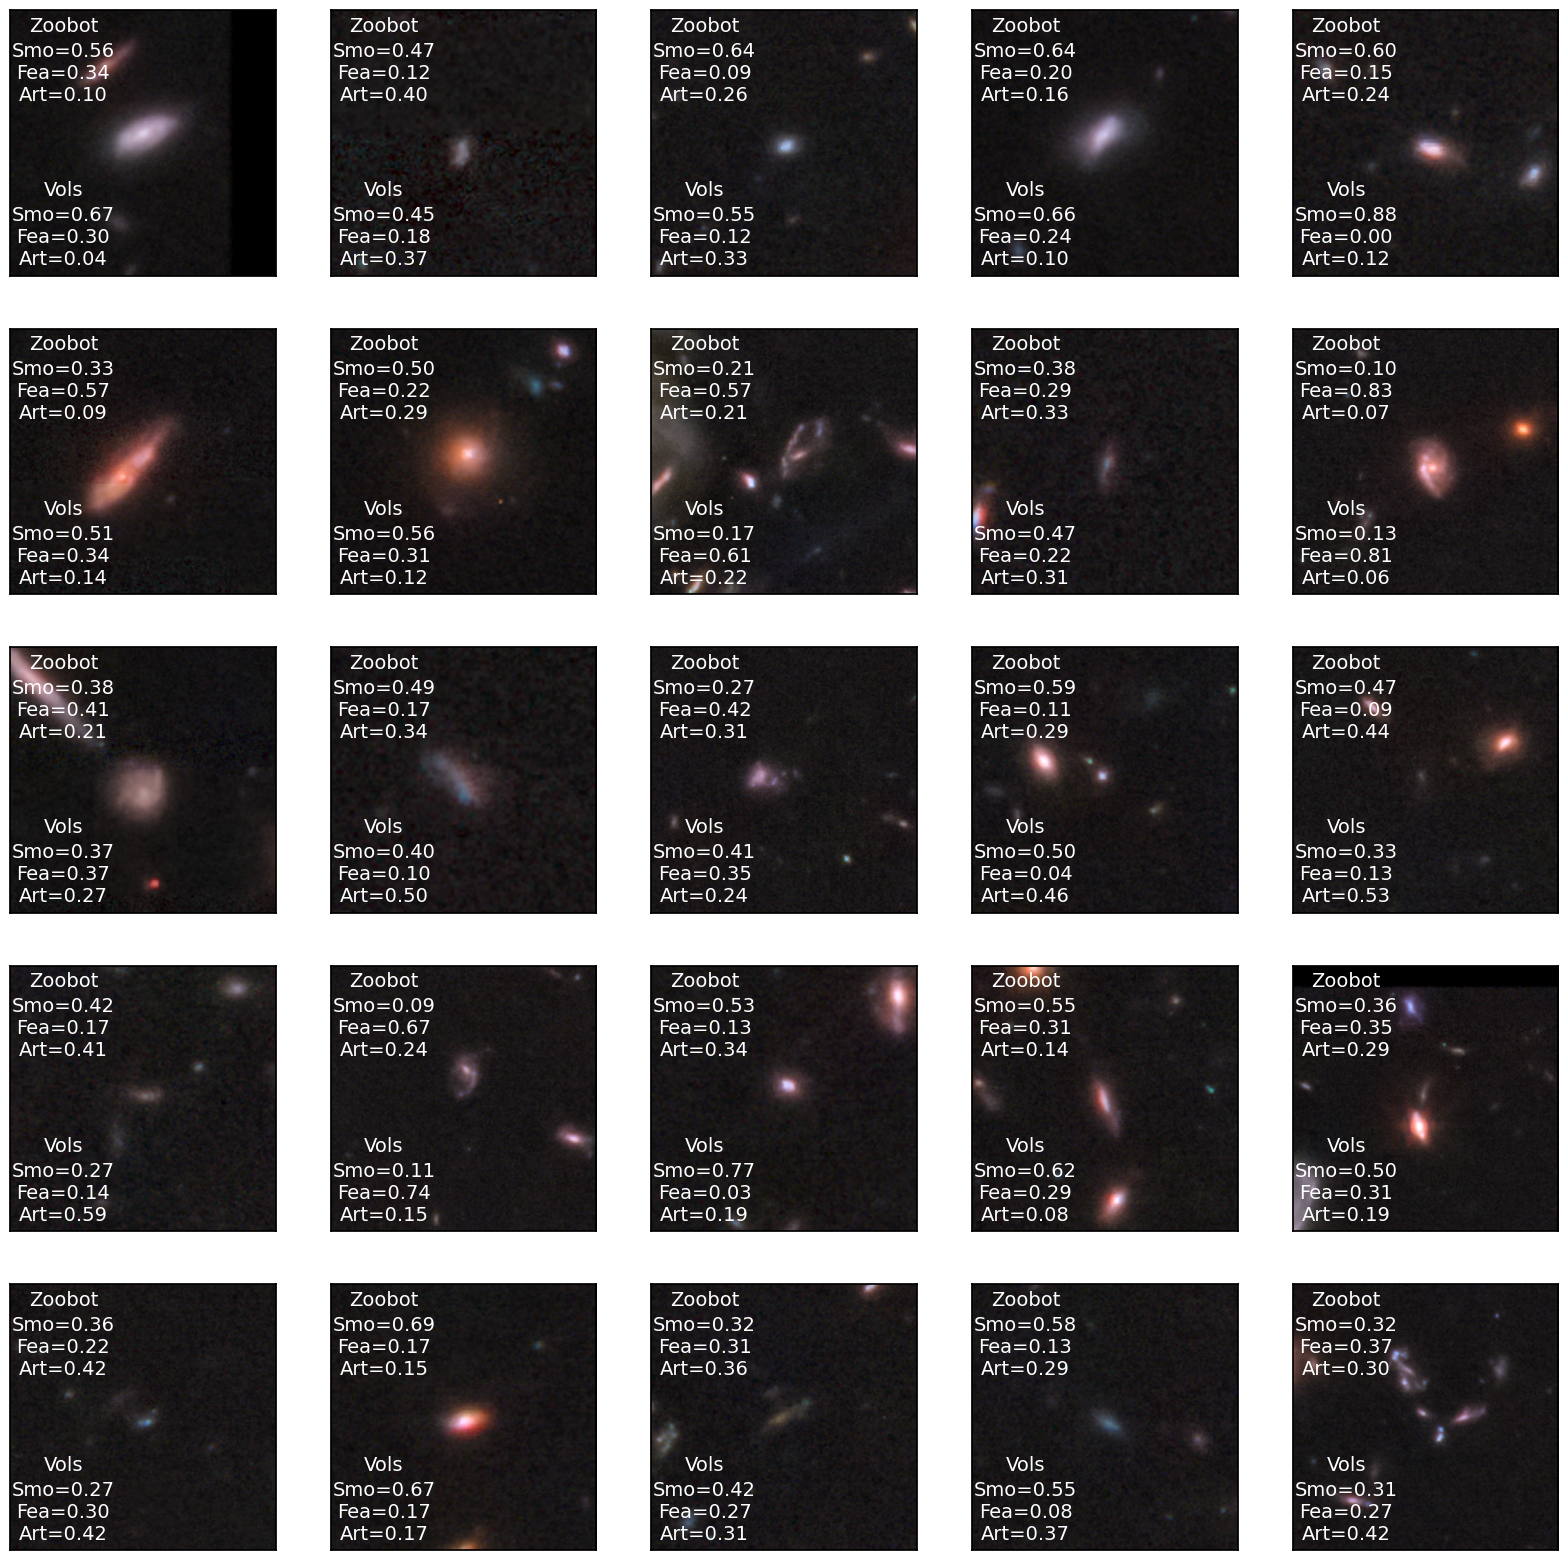

In [104]:
# plot a row of images with a text label for each image

def plot_images(df, rows, cols, figsize=(20, 20)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        galaxy = df.iloc[i]
        ax.imshow(Image.open(galaxy['file_loc']))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(100, 40, 'Zoobot', fontsize=14, color='white',  ha='center')
        ax.text(100, 170, 'Smo={:.2f}\nFea={:.2f}\nArt={:.2f}'.format(galaxy['smooth-or-featured-ml_smooth_fraction'], galaxy['smooth-or-featured-ml_featured-or-disk_fraction'], galaxy['smooth-or-featured-ml_star-artifact-zoom_fraction']), fontsize=14, color='white',  ha='center')
        
        ax.text(100, 350, 'Vols', fontsize=14, color='white',  ha='center')
        ax.text(100, 480, 'Smo={:.2f}\nFea={:.2f}\nArt={:.2f}'.format(galaxy['smooth-or-featured_smooth_fraction'], galaxy['smooth-or-featured_featured-or-disk_fraction'], galaxy['smooth-or-featured_star-artifact-zoom_fraction']), fontsize=14, color='white',  ha='center')
        
    plt.show()

plot_images(df, 5, 5, figsize=(20, 20))

Text(0, 0.5, 'Galaxies')

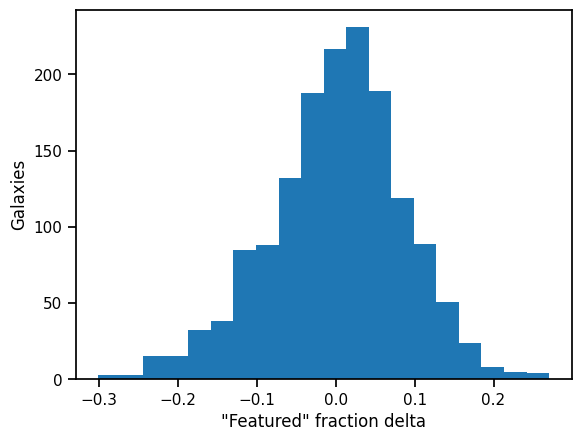

In [110]:
plt.hist(df['smooth-or-featured-ml_featured-or-disk_fraction'] - df['smooth-or-featured_featured-or-disk_fraction'], bins=20)
plt.xlabel('"Featured" fraction delta')
plt.ylabel('Galaxies')


In [111]:
(np.abs(df['smooth-or-featured-ml_featured-or-disk_fraction'] - df['smooth-or-featured_featured-or-disk_fraction']) > 0.1).mean()

0.24088541666666666